In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Caio\anaconda3\envs\ambiente\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dados = pd.read_csv('C:\\Users\\Caio\\Desktop\\Credit Card Customers\\Dados\\BankChurners.csv')

In [3]:
dados.shape

(10127, 23)

In [4]:
dados.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
dados.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace= True)

##### Os dados não possuem NAs

In [6]:
dados.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

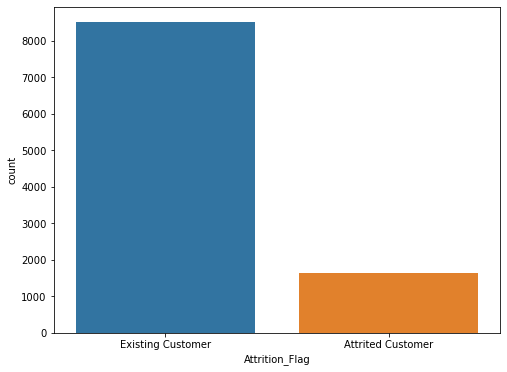

In [10]:
plt.subplots(figsize = (8,6))

x = sns.countplot(data = dados, x = 'Attrition_Flag')

In [11]:
perc = dados['Attrition_Flag'].value_counts(normalize=True)

print('No nosso Dataset {:.0f}% dos registros são clientes que fecharam suas contas. E {:.0f}% ainda possuem conta no banco'.format(perc[1]*100, perc[0]*100))

No nosso Dataset 16% dos registros são clientes que fecharam suas contas. E 84% ainda possuem conta no banco


In [12]:
# Deixando mais legível algumas categorias e especificando uma ordem

dados['Attrition_Flag'].replace('Existing Customer', 0, inplace = True)
dados['Attrition_Flag'].replace('Attrited Customer', 1, inplace = True)

dados['Income_Category'].replace('$120K +', '120K+', inplace=True)
dados['Income_Category'].replace('$40K - $60K', '40K - 60K', inplace=True)
dados['Income_Category'].replace('$60K - $80K', '60K - 80K', inplace=True)
dados['Income_Category'].replace('$80K - $120K', '80K - 120K', inplace=True)
dados['Income_Category'].replace('Less than $40K', '<40K', inplace=True)
dados['Income_Category'].replace('Unknown','Desconhecido', inplace=True)



custom_order = {'Desconhecido':0,'<40K':1,'40K - 60K':2,'60K - 80K':3,'80K - 120K':4,'120K+':5}


In [13]:
salario_cat_media = dados.groupby('Income_Category').agg({'Attrition_Flag':np.mean}).reset_index()
salario_cat_media.sort_values('Income_Category', key=lambda x: x.map(custom_order), inplace=True)
attrition_media = dados['Attrition_Flag'].mean()

Text(0.5, 0, '')

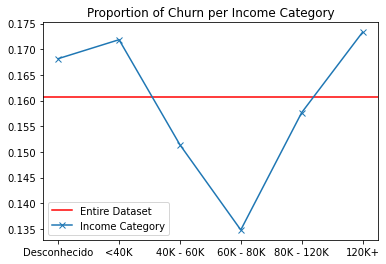

In [15]:
axes = plt.axes()
axes.axhline(attrition_media, color = 'red')
salario_cat_media.plot(y = 'Attrition_Flag', x = 'Income_Category',marker = 'x' ,ax = axes, legend = False)
axes.set_title('Proportion of Churn per Income Category')
axes.legend(['Entire Dataset', 'Income Category'])
axes.set_xlabel('')


In [16]:
dados['Income_Category'].value_counts()

<40K            3561
40K - 60K       1790
80K - 120K      1535
60K - 80K       1402
Desconhecido    1112
120K+            727
Name: Income_Category, dtype: int64

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

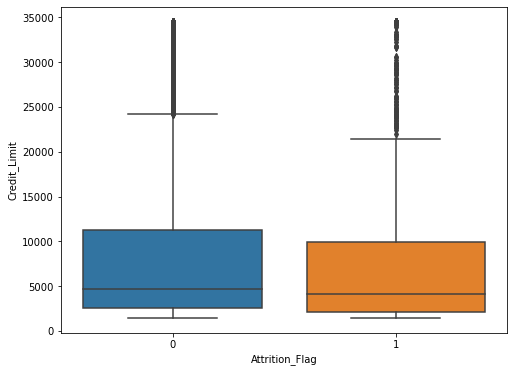

In [17]:
plt.figure(figsize=(8,6))

sns.boxplot(x = 'Attrition_Flag', y = 'Credit_Limit', data = dados)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

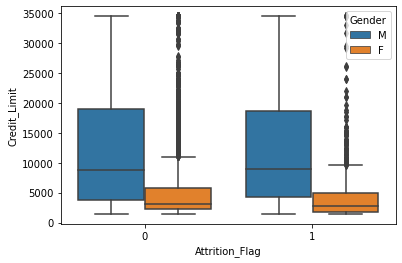

In [18]:
sns.boxplot(data = dados, x = 'Attrition_Flag', y = 'Credit_Limit', hue = 'Gender')

In [38]:
dep_count_media = dados.groupby('Dependent_count').agg({'Attrition_Flag': np.mean}).reset_index()

Text(0.5, 0, '')

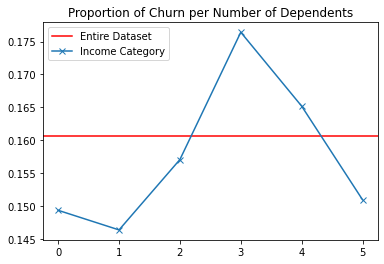

In [40]:
axes = plt.axes()
axes.axhline(attrition_media, color = 'red')
dep_count_media.plot(y = 'Attrition_Flag', x = 'Dependent_count',marker = 'x' ,ax = axes, legend = False)
axes.set_title('Proportion of Churn per Number of Dependents')
axes.legend(['Entire Dataset', 'Income Category'])
axes.set_xlabel('')

In [21]:
card_cat_media = dados.groupby('Card_Category').agg({'Attrition_Flag':np.mean}).reset_index().sort_values('Attrition_Flag', ascending=False)

#### Há uma maior proporção de churn em clientes com cartão do tipo platinum. A proporção de churn é bem maior que a média como podemos ver no gráfico abaixo

Text(0.5, 0, '')

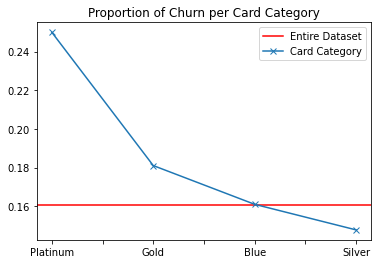

In [41]:
axes = plt.axes()
axes.axhline(attrition_media, color = 'red')
card_cat_media.plot(y = 'Attrition_Flag', x = 'Card_Category',marker = 'x' ,ax = axes, legend = False)
axes.set_title('Proportion of Churn per Card Category')
axes.legend(['Entire Dataset', 'Card Category'])
axes.set_xlabel('')


In [23]:
dados.groupby(['Card_Category', 'Attrition_Flag']).agg({'CLIENTNUM':'count'})

CLIENTNUM
Card_Category Attrition_Flag           
Blue          0                    7917
              1                    1519
Gold          0                      95
              1                      21
Platinum      0                      15
              1                       5
Silver        0                     473
              1                      82

##### Aparentemente há uma maior proporção de churn nos clientes que entraram muitas vezes em contato com o banco no último ano.

##### Isso faz sentido! Caso você esteja insatisfeito com o serviço de um produto certamente irá entrar em contato com o fornecedor para buscar melhorias.

In [24]:
dados.groupby('Contacts_Count_12_mon').agg({'Attrition_Flag':[np.mean, 'count']})

Attrition_Flag      
                                mean count
Contacts_Count_12_mon                     
0                           0.017544   399
1                           0.072048  1499
2                           0.124884  3227
3                           0.201479  3380
4                           0.226293  1392
5                           0.335227   176
6                           1.000000    54

In [25]:
dados.groupby(['Contacts_Count_12_mon', 'Attrition_Flag'])[['CLIENTNUM']].count()

CLIENTNUM
Contacts_Count_12_mon Attrition_Flag           
0                     0                     392
                      1                       7
1                     0                    1391
                      1                     108
2                     0                    2824
                      1                     403
3                     0                    2699
                      1                     681
4                     0                    1077
                      1                     315
5                     0                     117
                      1                      59
6                     1                      54

In [26]:
contacts_mean = dados.groupby(['Contacts_Count_12_mon']).agg({'Attrition_Flag':np.mean}).reset_index().sort_values('Attrition_Flag', ascending=False)

Text(0.5, 0, '')

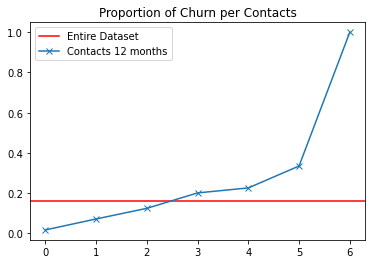

In [28]:
axes = plt.axes()
axes.axhline(attrition_media, color = 'red')
contacts_mean.plot(y = 'Attrition_Flag', x = 'Contacts_Count_12_mon',marker = 'x' ,ax = axes, legend = False)
axes.set_title('Proportion of Churn per Contacts')
axes.legend(['Entire Dataset', 'Contacts 12 months'])
axes.set_xlabel('')

#### Há uma maior proporção de churn nos clientes que possuem menor número de produtos. A taxa de churn nesses clientes é bem superior que a taxa média de churn de 16%. 

#### Portanto, 'Total_Relationship_Count' pode ser uma boa variável para predição de churn

In [37]:
prod_customer_mean = dados.groupby(['Total_Relationship_Count']).agg({'Attrition_Flag':np.mean}).reset_index()

Text(0.5, 0, '')

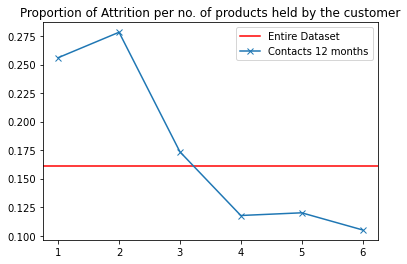

In [44]:
axes = plt.axes()
axes.axhline(attrition_media, color = 'red')
prod_customer_mean.plot(y = 'Attrition_Flag', x = 'Total_Relationship_Count',marker = 'x' ,ax = axes, legend = False)
axes.set_title('Proportion of Attrition per no. of products held by the customer')
axes.legend(['Entire Dataset', 'Contacts 12 months'])
axes.set_xlabel('')

In [43]:
dados.groupby(['Total_Relationship_Count', 'Attrition_Flag']).agg({'CLIENTNUM':'count'})

CLIENTNUM
Total_Relationship_Count Attrition_Flag           
1                        0                     677
                         1                     233
2                        0                     897
                         1                     346
3                        0                    1905
                         1                     400
4                        0                    1687
                         1                     225
5                        0                    1664
                         1                     227
6                        0                    1670
                         1                     196

(array([4313., 1296.,  790.,  494.,  351.,  265.,  224.,  139.,  108.,
         520.]),
 array([ 1438.3 ,  4746.07,  8053.84, 11361.61, 14669.38, 17977.15,
        21284.92, 24592.69, 27900.46, 31208.23, 34516.  ]),
 <BarContainer object of 10 artists>)

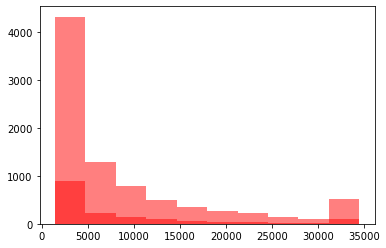

In [53]:
axes = plt.axes()

axes.hist(dados[dados['Attrition_Flag'] == 1]['Credit_Limit'], alpha = 0.5, color = 'red', label = 'aaa')
axes.hist(dados[dados['Attrition_Flag'] == 0]['Credit_Limit'], alpha = 0.5, color = 'red', label = 'aaa')



<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

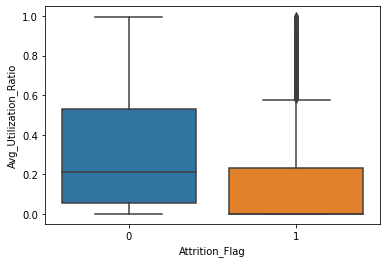

In [55]:
sns.boxplot(data=dados, x = 'Attrition_Flag', y = 'Avg_Utilization_Ratio')

#### Que tal medirmos a correlação linear entre as variáveis ?

In [42]:
corr = dados.corr()

<AxesSubplot:>

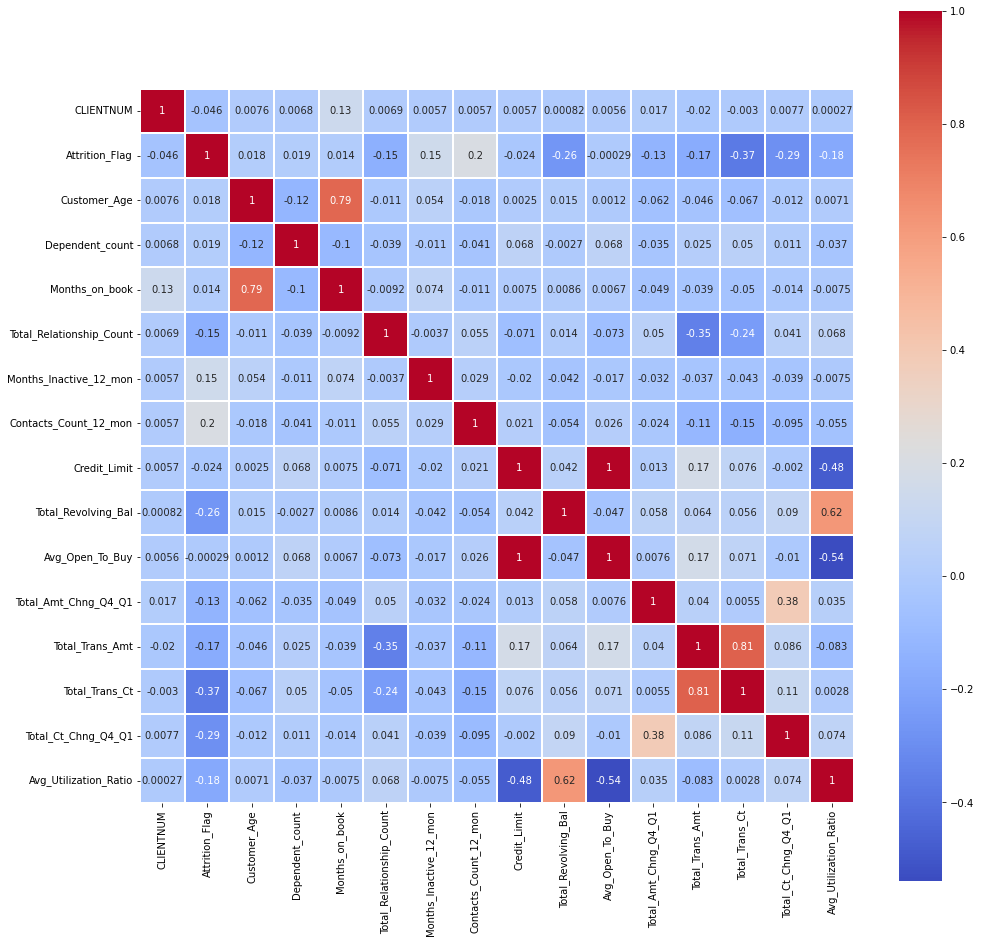

In [43]:
plt.figure(figsize=(16,16)) 
sns.heatmap(data=corr,annot=True,linewidths=0.4,cmap='coolwarm', square=True)

## O que aprendemos com essa rápida análise exploratória ?

##### 1. Os dados são desbalanceados. Nosso target 'Attriting Customer' representa 16% de todo o dataset

##### 2. Variáveis como Total_Relationship_Count, Contacts_Count_12_mon podem ser boas preditoras pois apresentam grupos que possuem alta taxa de churn(maior até mesmo que a média geral)

##### 3. A Variável Card_Category também apresenta grupos com alta taxa de churn porém com poucos registros em alguns desses grupos. O cartão do tipo Platinum só tem 15 registros sendo 5 churn.

##### 4. Variáveis como 'Total_Trans_CT','Total_Ct_Chng_Q4_Q1', 'Credit_Limit', 'Total_Revolving_Bal' possuem uma correlação linear moderada com a variável resposta